In [149]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import xml.dom.minidom as m
import xml.etree.ElementTree as et
import time as time
import json
from matplotlib import pyplot as plt

In [150]:
# import data for Alzheimer articles
al_dict = {}
with open("Alzheimer.json") as f:
    al_dict = json.load(f)

In [151]:
# import data for cancer articles
cn_dict = {}
with open("Cancer.json") as f:
    cn_dict = json.load(f)

In [152]:
# create dataframe from al_dict
al_df = pd.DataFrame.from_dict(al_dict, orient='index')
al_df.head()

,title,abstract,query,mesh
33939349,Electroconvulsive Therapy for the Treatment of...,Dementia refers to a state of cognitive impair...,Alzheimer's,N/A
33841007,Gintonin facilitates brain delivery of donepez...,Gintonin is a ginseng-derived exogenous G-prot...,Alzheimer's,N/A
33627920,Bayesian Scalar on Image Regression With Nonig...,Medical imaging has become an increasingly imp...,Alzheimer's,N/A
33463291,The Structural Basis of Amyloid Strains in Alz...,Amyloid fibrils represent one of the defining ...,Alzheimer's,Alzheimer Disease
33323224,Healthy ageing through internet counselling in...,Although web-based interventions have been pro...,Alzheimer's,Aged


In [153]:
# create dataframe from cn_dict
cn_df = pd.DataFrame.from_dict(cn_dict, orient='index')
cn_df.head()

,title,abstract,query,mesh
34590506,Diarylpentanones from the root of Wikstroemia ...,"One new diarylpentanone, 4(S)-hydroxy-1, 5-dip...",Cancer,A549 Cells
34539049,Re-evaluating standards of human subjects prot...,This study addresses ethical questions about c...,Cancer,N/A
34539046,Inference for L-estimators of location using a...,In this note we propose a new semi-parametric ...,Cancer,N/A
34493369,The ITGB6 gene: its role in experimental and c...,Integrin &#945;v&#946;6 is a membrane-spanning...,Cancer,Animals
34460208,Advancing the Science of Cancer in Latinos,Cancer is the leading cause of death among Lat...,Cancer,N/A


In [154]:
# count number of Alzheimer papers that have no MeSH terms
# note that the finding of mesh terms in Q1 is incorrect hence no mesh terms exist in dataframes, but this is inaccurate
al_no_mesh = len(al_df[al_df['mesh'] == "N/A"])
print("There are", al_no_mesh, "Alzheimer papers that have no MeSH terms.")

There are 164 Alzheimer papers that have no MeSH terms.


In [155]:
# count number of cancer papers that have no MeSH terms
cn_no_mesh = len(cn_df[cn_df['mesh'] == "N/A"])
print("There are", cn_no_mesh, "cancer papers that have no MeSH terms.")

There are 756 cancer papers that have no MeSH terms.


In [156]:
# function for finding 10 most frequent mesh terms
# returns a dictionary sorted by keys in descending order
def mesh_frequency(df):
    mesh_counts = {}
    meshes = df['mesh']
    for m in meshes:
        if m not in mesh_counts: mesh_counts[m] = 0
        mesh_counts[m] += 1
    mesh_counts = sorted(mesh_counts.items(), key=lambda item: item[1], reverse=True)
    return mesh_counts

In [157]:
# mesh terms in al_df ordered by frequency
al_top_10_mesh = mesh_frequency(al_df)
al_top_10_mesh = al_top_10_mesh[:11]
index_na = [i[0] for i in al_top_10_mesh].index('N/A')
na_mesh_al = al_top_10_mesh.pop(index_na)
# print(al_top_10_mesh)

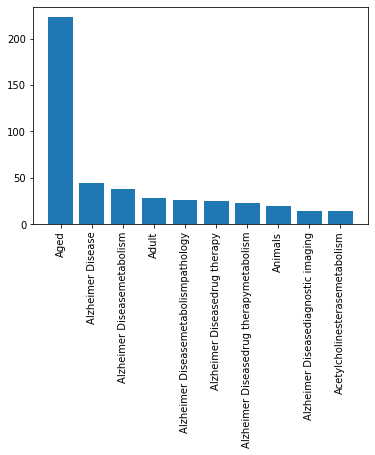

In [158]:
# plot frequency of 10 most common al_df mesh terms
al_x = [i[0] for i in al_top_10_mesh]
# print(al_x)
al_y = [i[1] for i in al_top_10_mesh]
# print(al_y)

plt.bar(range(len(al_top_10_mesh)), al_y, tick_label=al_x)
plt.xticks(rotation='vertical')
plt.show()

In [159]:
# 10 most frequent mesh terms in cn_df
cn_top_10_mesh = mesh_frequency(cn_df)
cn_top_10_mesh = cn_top_10_mesh[:11]
index_na = [i[0] for i in cn_top_10_mesh].index('N/A')
na_mesh = cn_top_10_mesh.pop(index_na)
# print(cn_top_10_mesh)

['Adult', 'Animals', 'Aged', 'Adolescent', 'Humans', 'Cell Line, Tumor', 'Drug Delivery Systems', 'Biopsy', 'Diagnosis, Differential', 'A549 Cells']
[34, 27, 23, 15, 5, 4, 3, 3, 3, 2]


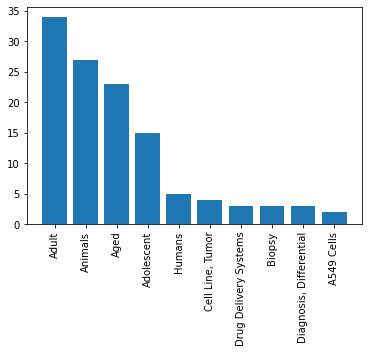

In [160]:
# plot frequency of 10 most common cn_df mesh terms
cn_x = [i[0] for i in cn_top_10_mesh]
print(cn_x)
cn_y = [i[1] for i in cn_top_10_mesh]
print(cn_y)

plt.bar(range(len(cn_top_10_mesh)), cn_y, tick_label=cn_x)
plt.xticks(rotation='vertical')
plt.show()

In [161]:
# table comparing number of articles from cn_df and al_df that have both matching mesh terms as specified in homework manual
al_top_5_mesh = al_x[:5]
al_top_5_mesh_freq = al_y[:5]

cn_top_5_mesh = cn_x[:5]
cn_top_5_mesh_freq = cn_y[:5]
print(al_top_5_mesh, '\n', cn_top_5_mesh)
print(al_top_5_mesh_freq, '\n', cn_top_5_mesh_freq)

al_cn_mesh = pd.DataFrame(index=al_top_5_mesh, columns=cn_top_5_mesh)

i = 0
while i < 5:
    j = 0
    while j < 5:
        al_cn_mesh.iloc[i][j] = al_top_5_mesh_freq[i] + cn_top_5_mesh_freq[j]
        j += 1
    i += 1

al_cn_mesh.head()

['Aged', 'Alzheimer Disease', 'Alzheimer Diseasemetabolism', 'Adult', 'Alzheimer Diseasemetabolismpathology'] 
 ['Adult', 'Animals', 'Aged', 'Adolescent', 'Humans']
[223, 45, 38, 28, 26] 
 [34, 27, 23, 15, 5]


,Adult,Animals,Aged,Adolescent,Humans
Aged,257,250,246,238,228
Alzheimer Disease,79,72,68,60,50
Alzheimer Diseasemetabolism,72,65,61,53,43
Adult,62,55,51,43,33
Alzheimer Diseasemetabolismpathology,60,53,49,41,31
